**CNN - Basic convolutional neural networks**

Recommended reads: 
* https://medium.freecodecamp.org/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050
* https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2

**Convolutional neural network:**
![img 404](https://cdn-images-1.medium.com/max/1600/1*NQQiyYqJJj4PSYAeWvxutg.png)

CNN usually consists of a series of convolution + pooling layers, followed by fully connected layers

**Convolutions:** <br />
Definitions:
<img src="https://cdn-images-1.medium.com/max/1600/1*cTEp-IvCCUYPTT0QpE3Gjg@2x.png" alt="Drawing" style="width: 400px;"/>

**Input** - input image, usually a 3D array of RGB values. <br />
**Kernel** - filter, matrix operation that will be applied to transform input image <br />

Convolution - cell 1
<img src="https://cdn-images-1.medium.com/max/1600/1*ghaknijNGolaA3DpjvDxfQ@2x.png" alt="Drawing" style="width: 400px;"/>
Convolution - cell 2
<img src="https://cdn-images-1.medium.com/max/1600/1*oxOsZPfZFxgGZw2ycQnenw@2x.png" alt="Drawing" style="width: 400px;"/>


**Pooling:** <br />

<img src="https://cdn-images-1.medium.com/max/1600/1*ReZNSf_Yr7Q1nqegGirsMQ@2x.png" alt="Drawing" style="width: 400px;"/>

MaxPooling takes the maximum value from the selected cells. Main purpose is to downsample the input but keep the most important information


Demo showcase - let's start with the usual - sample photo of a cat!:

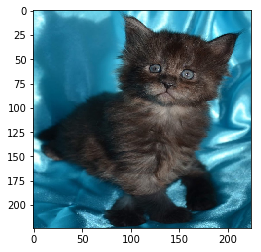

In [2]:
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

# load an image from file
raw_image = load_img('./data/cnn_image/image_cat.jpeg', target_size=(224, 224))
plt.imshow(raw_image)

We are going to use a CNN that has already been trained for us and is publicly available - VGG16. It's a network consisting of 16 layers <a href="https://cdn-images-1.medium.com/max/1600/1*U8uoGoZDs8nwzQE3tOhfkw@2x.png">(see architecture)</a> and has already been pre-trained for us on <a href="http://www.image-net.org/"> Imagenet dataset </a>.

Due to it's popularity VGG16 is already included in some of the most popular ML frameworks - we will use the one  <a href="https://keras.io/applications/#vgg16">provided by Keras</a>.


In [3]:
from keras.applications.vgg16 import VGG16

model = VGG16(weights = 'imagenet', input_shape=(224, 224, 3))

In [13]:
model2 = VGG16(weights = 'imagenet', input_shape=(220, 220, 3), include_top=False)

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [15]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 220, 220, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 220, 220, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 220, 220, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 110, 110, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 110, 110, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 110, 110, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 55, 55, 128)       0         
__________

Now we can convert our image to array of values.

In [16]:
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import decode_predictions

image_arr = img_to_array(raw_image)
image_arr.shape

(224, 224, 3)

Due to API requirements, we need an arary of images, therefore we add 1 dimension

In [17]:
image = image_arr.reshape((1, image_arr.shape[0], image_arr.shape[1], image_arr.shape[2]))
image.shape

(1, 224, 224, 3)

Now we can run the prediction and see the output of our CNN network!

In [18]:
item = model.predict(image)
labels = decode_predictions(item)
print(labels)

[[('n02123394', 'Persian_cat', 0.9991867), ('n02127052', 'lynx', 0.0003814413), ('n02328150', 'Angora', 0.00016468475), ('n03958227', 'plastic_bag', 9.170757e-05), ('n03482405', 'hamper', 3.2461587e-05)]]


Usually it is advised to preprocess the image before feeding it into vgg16. Keras also provides us with functions for that. Let's see how our image would look like after preprocessing:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


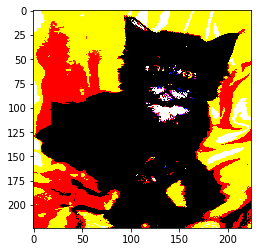

In [19]:
from keras.applications.vgg16 import preprocess_input

image_arr = img_to_array(raw_image)
image = image_arr.reshape((1, image_arr.shape[0], image_arr.shape[1], image_arr.shape[2]))

# prepare the image for the VGG model
image_processed = preprocess_input(image)
plt.imshow(image_processed[0])

Let's see how it would be classified by a network now!

In [20]:
item = model.predict(image_processed)
labels = decode_predictions(item)
print(labels)

[[('n02123394', 'Persian_cat', 0.98178196), ('n02127052', 'lynx', 0.005701773), ('n02123045', 'tabby', 0.003358725), ('n03958227', 'plastic_bag', 0.002392506), ('n02123597', 'Siamese_cat', 0.002104175)]]


** Part II - CNN Activation ** <br />
Let's try to analize why our network decided to say that the picture is a (persian) cat. We can use <a href="https://raghakot.github.io/keras-vis/">keras-vis</a> module to inspect our vgg16 network.

Great example can be found in attached <a href="https://github.com/raghakot/keras-vis/blob/master/examples/vggnet/activation_maximization.ipynb">keras vis notebooks </a>

In [21]:
from keras.applications import VGG16
from vis.utils import utils
from keras import activations

# Build the VGG16 network with ImageNet weights
model = VGG16(weights='imagenet', include_top=True)

# Utility to search for layer index by name.
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'predictions')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Let's have a look how VGG16 "imagines" Persian cats to look like. We can expore the activation for "Persian cat" class. According to <a href="https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a">this document</a>, Persian cat's ID is 283. We therefore explore what activate's the neuron responsible for class no. 283. 

For that, we use <a href="https://raghakot.github.io/keras-vis/vis.visualization/#visualize_activation">visualize_activation</a> from Keras API. This function will iteratively try to generate the input that will maximize the output of the given layer -> in our case we will be checking which input will maximize the output of a neuron that maximizes the "Persian cat" class.

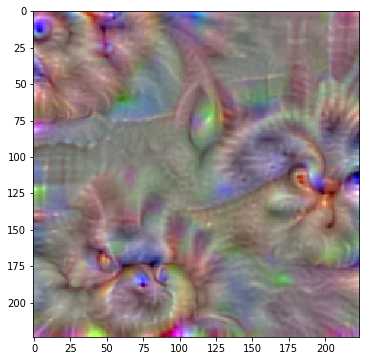

In [22]:
from vis.visualization import visualize_activation

CLASS_ID=283

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

img = visualize_activation(model, layer_idx, filter_indices=CLASS_ID)
plt.imshow(img)

Let's do a couple more iterations on activation function

Iteration: 1, named_losses: [('ActivationMax Loss', -0.0005503874),
 ('L-6.0 Norm Loss', 0.063258365),
 ('TV(2.0) Loss', 6455.682)], overall loss: 6455.74462890625
Iteration: 2, named_losses: [('ActivationMax Loss', 0.029454695),
 ('L-6.0 Norm Loss', 0.062685646),
 ('TV(2.0) Loss', 3417.83)], overall loss: 3417.922119140625
Iteration: 3, named_losses: [('ActivationMax Loss', 0.010223167),
 ('L-6.0 Norm Loss', 0.06234756),
 ('TV(2.0) Loss', 1873.049)], overall loss: 1873.1214599609375
Iteration: 4, named_losses: [('ActivationMax Loss', -0.14795233),
 ('L-6.0 Norm Loss', 0.062128216),
 ('TV(2.0) Loss', 994.1483)], overall loss: 994.0625
Iteration: 5, named_losses: [('ActivationMax Loss', -0.45241457),
 ('L-6.0 Norm Loss', 0.06198367),
 ('TV(2.0) Loss', 485.76038)], overall loss: 485.36993408203125
Iteration: 6, named_losses: [('ActivationMax Loss', -1.4190425),
 ('L-6.0 Norm Loss', 0.06189018),
 ('TV(2.0) Loss', 204.06161)], overall loss: 202.7044677734375
Iteration: 7, named_losses: [('

Iteration: 55, named_losses: [('ActivationMax Loss', -59.96471),
 ('L-6.0 Norm Loss', 0.061873432),
 ('TV(2.0) Loss', 31.878119)], overall loss: -28.024717330932617
Iteration: 56, named_losses: [('ActivationMax Loss', -53.82733),
 ('L-6.0 Norm Loss', 0.061875872),
 ('TV(2.0) Loss', 31.764826)], overall loss: -22.00063133239746
Iteration: 57, named_losses: [('ActivationMax Loss', -62.582085),
 ('L-6.0 Norm Loss', 0.061881147),
 ('TV(2.0) Loss', 31.904821)], overall loss: -30.615381240844727
Iteration: 58, named_losses: [('ActivationMax Loss', -59.821968),
 ('L-6.0 Norm Loss', 0.06188341),
 ('TV(2.0) Loss', 32.214165)], overall loss: -27.545921325683594
Iteration: 59, named_losses: [('ActivationMax Loss', -63.224766),
 ('L-6.0 Norm Loss', 0.06188705),
 ('TV(2.0) Loss', 32.95239)], overall loss: -30.210491180419922
Iteration: 60, named_losses: [('ActivationMax Loss', -61.167603),
 ('L-6.0 Norm Loss', 0.061890017),
 ('TV(2.0) Loss', 32.426197)], overall loss: -28.679515838623047
Iteration:

Iteration: 109, named_losses: [('ActivationMax Loss', -93.02678),
 ('L-6.0 Norm Loss', 0.062055323),
 ('TV(2.0) Loss', 47.02848)], overall loss: -45.936241149902344
Iteration: 110, named_losses: [('ActivationMax Loss', -92.90945),
 ('L-6.0 Norm Loss', 0.06205948),
 ('TV(2.0) Loss', 46.42829)], overall loss: -46.419097900390625
Iteration: 111, named_losses: [('ActivationMax Loss', -90.267715),
 ('L-6.0 Norm Loss', 0.062061526),
 ('TV(2.0) Loss', 47.33554)], overall loss: -42.87010955810547
Iteration: 112, named_losses: [('ActivationMax Loss', -93.08028),
 ('L-6.0 Norm Loss', 0.06206633),
 ('TV(2.0) Loss', 45.72799)], overall loss: -47.29022216796875
Iteration: 113, named_losses: [('ActivationMax Loss', -94.392105),
 ('L-6.0 Norm Loss', 0.062068578),
 ('TV(2.0) Loss', 47.227833)], overall loss: -47.10220718383789
Iteration: 114, named_losses: [('ActivationMax Loss', -89.9164),
 ('L-6.0 Norm Loss', 0.062073294),
 ('TV(2.0) Loss', 47.20776)], overall loss: -42.64656448364258
Iteration: 115

Iteration: 163, named_losses: [('ActivationMax Loss', -112.08721),
 ('L-6.0 Norm Loss', 0.06224329),
 ('TV(2.0) Loss', 55.263947)], overall loss: -56.761024475097656
Iteration: 164, named_losses: [('ActivationMax Loss', -108.37199),
 ('L-6.0 Norm Loss', 0.062245518),
 ('TV(2.0) Loss', 54.418)], overall loss: -53.89173889160156
Iteration: 165, named_losses: [('ActivationMax Loss', -113.67206),
 ('L-6.0 Norm Loss', 0.062249184),
 ('TV(2.0) Loss', 55.192974)], overall loss: -58.41683578491211
Iteration: 166, named_losses: [('ActivationMax Loss', -104.85074),
 ('L-6.0 Norm Loss', 0.062252574),
 ('TV(2.0) Loss', 54.436428)], overall loss: -50.352054595947266
Iteration: 167, named_losses: [('ActivationMax Loss', -114.97045),
 ('L-6.0 Norm Loss', 0.062254675),
 ('TV(2.0) Loss', 56.12546)], overall loss: -58.78273391723633
Iteration: 168, named_losses: [('ActivationMax Loss', -105.43593),
 ('L-6.0 Norm Loss', 0.062258985),
 ('TV(2.0) Loss', 54.119034)], overall loss: -51.254638671875
Iteration

Iteration: 217, named_losses: [('ActivationMax Loss', -116.90083),
 ('L-6.0 Norm Loss', 0.062411927),
 ('TV(2.0) Loss', 58.783855)], overall loss: -58.054569244384766
Iteration: 218, named_losses: [('ActivationMax Loss', -121.74125),
 ('L-6.0 Norm Loss', 0.062415067),
 ('TV(2.0) Loss', 59.62788)], overall loss: -62.05095291137695
Iteration: 219, named_losses: [('ActivationMax Loss', -121.476295),
 ('L-6.0 Norm Loss', 0.0624179),
 ('TV(2.0) Loss', 59.386253)], overall loss: -62.027626037597656
Iteration: 220, named_losses: [('ActivationMax Loss', -119.56139),
 ('L-6.0 Norm Loss', 0.062421598),
 ('TV(2.0) Loss', 60.17493)], overall loss: -59.324039459228516
Iteration: 221, named_losses: [('ActivationMax Loss', -119.96355),
 ('L-6.0 Norm Loss', 0.062424626),
 ('TV(2.0) Loss', 59.039524)], overall loss: -60.86159896850586
Iteration: 222, named_losses: [('ActivationMax Loss', -122.44856),
 ('L-6.0 Norm Loss', 0.0624275),
 ('TV(2.0) Loss', 59.981754)], overall loss: -62.40438461303711
Iterat

Iteration: 271, named_losses: [('ActivationMax Loss', -130.50996),
 ('L-6.0 Norm Loss', 0.062583745),
 ('TV(2.0) Loss', 63.578373)], overall loss: -66.8690185546875
Iteration: 272, named_losses: [('ActivationMax Loss', -130.31413),
 ('L-6.0 Norm Loss', 0.06258507),
 ('TV(2.0) Loss', 64.183174)], overall loss: -66.06836700439453
Iteration: 273, named_losses: [('ActivationMax Loss', -129.85153),
 ('L-6.0 Norm Loss', 0.06258877),
 ('TV(2.0) Loss', 64.03619)], overall loss: -65.75275421142578
Iteration: 274, named_losses: [('ActivationMax Loss', -129.77876),
 ('L-6.0 Norm Loss', 0.06258977),
 ('TV(2.0) Loss', 64.46924)], overall loss: -65.24693298339844
Iteration: 275, named_losses: [('ActivationMax Loss', -130.5748),
 ('L-6.0 Norm Loss', 0.06259344),
 ('TV(2.0) Loss', 64.15255)], overall loss: -66.35965728759766
Iteration: 276, named_losses: [('ActivationMax Loss', -133.03574),
 ('L-6.0 Norm Loss', 0.06259533),
 ('TV(2.0) Loss', 64.658806)], overall loss: -68.31433868408203
Iteration: 277

Iteration: 325, named_losses: [('ActivationMax Loss', -132.55125),
 ('L-6.0 Norm Loss', 0.06274839),
 ('TV(2.0) Loss', 66.05108)], overall loss: -66.43743133544922
Iteration: 326, named_losses: [('ActivationMax Loss', -140.63464),
 ('L-6.0 Norm Loss', 0.0627521),
 ('TV(2.0) Loss', 67.14773)], overall loss: -73.42415618896484
Iteration: 327, named_losses: [('ActivationMax Loss', -131.87434),
 ('L-6.0 Norm Loss', 0.06275651),
 ('TV(2.0) Loss', 66.14288)], overall loss: -65.668701171875
Iteration: 328, named_losses: [('ActivationMax Loss', -139.86676),
 ('L-6.0 Norm Loss', 0.062759854),
 ('TV(2.0) Loss', 68.32933)], overall loss: -71.47467041015625
Iteration: 329, named_losses: [('ActivationMax Loss', -133.80855),
 ('L-6.0 Norm Loss', 0.06276187),
 ('TV(2.0) Loss', 66.81805)], overall loss: -66.92774200439453
Iteration: 330, named_losses: [('ActivationMax Loss', -140.7177),
 ('L-6.0 Norm Loss', 0.06276783),
 ('TV(2.0) Loss', 68.29615)], overall loss: -72.35877227783203
Iteration: 331, nam

Iteration: 379, named_losses: [('ActivationMax Loss', -143.42397),
 ('L-6.0 Norm Loss', 0.06291526),
 ('TV(2.0) Loss', 70.146)], overall loss: -73.21504974365234
Iteration: 380, named_losses: [('ActivationMax Loss', -141.02611),
 ('L-6.0 Norm Loss', 0.06291848),
 ('TV(2.0) Loss', 69.05192)], overall loss: -71.9112777709961
Iteration: 381, named_losses: [('ActivationMax Loss', -143.17703),
 ('L-6.0 Norm Loss', 0.06292179),
 ('TV(2.0) Loss', 70.80096)], overall loss: -72.31314849853516
Iteration: 382, named_losses: [('ActivationMax Loss', -141.1077),
 ('L-6.0 Norm Loss', 0.06292511),
 ('TV(2.0) Loss', 70.38319)], overall loss: -70.66158294677734
Iteration: 383, named_losses: [('ActivationMax Loss', -143.93443),
 ('L-6.0 Norm Loss', 0.06292837),
 ('TV(2.0) Loss', 70.2046)], overall loss: -73.66690826416016
Iteration: 384, named_losses: [('ActivationMax Loss', -143.50867),
 ('L-6.0 Norm Loss', 0.06293016),
 ('TV(2.0) Loss', 70.90075)], overall loss: -72.54499053955078
Iteration: 385, named

Iteration: 433, named_losses: [('ActivationMax Loss', -150.66153),
 ('L-6.0 Norm Loss', 0.06307722),
 ('TV(2.0) Loss', 73.013504)], overall loss: -77.58494567871094
Iteration: 434, named_losses: [('ActivationMax Loss', -142.7529),
 ('L-6.0 Norm Loss', 0.06307852),
 ('TV(2.0) Loss', 72.40288)], overall loss: -70.28694152832031
Iteration: 435, named_losses: [('ActivationMax Loss', -149.47397),
 ('L-6.0 Norm Loss', 0.063081905),
 ('TV(2.0) Loss', 72.88504)], overall loss: -76.52584838867188
Iteration: 436, named_losses: [('ActivationMax Loss', -142.3217),
 ('L-6.0 Norm Loss', 0.063084714),
 ('TV(2.0) Loss', 71.39747)], overall loss: -70.86115264892578
Iteration: 437, named_losses: [('ActivationMax Loss', -147.37657),
 ('L-6.0 Norm Loss', 0.06308723),
 ('TV(2.0) Loss', 71.95984)], overall loss: -75.35365295410156
Iteration: 438, named_losses: [('ActivationMax Loss', -140.74933),
 ('L-6.0 Norm Loss', 0.06309112),
 ('TV(2.0) Loss', 70.384995)], overall loss: -70.30123901367188
Iteration: 439

Iteration: 487, named_losses: [('ActivationMax Loss', -148.07747),
 ('L-6.0 Norm Loss', 0.06323628),
 ('TV(2.0) Loss', 73.03079)], overall loss: -74.98344421386719
Iteration: 488, named_losses: [('ActivationMax Loss', -155.38489),
 ('L-6.0 Norm Loss', 0.06323853),
 ('TV(2.0) Loss', 73.43848)], overall loss: -81.8831787109375
Iteration: 489, named_losses: [('ActivationMax Loss', -147.0341),
 ('L-6.0 Norm Loss', 0.06324071),
 ('TV(2.0) Loss', 73.45689)], overall loss: -73.51396942138672
Iteration: 490, named_losses: [('ActivationMax Loss', -154.1467),
 ('L-6.0 Norm Loss', 0.063244246),
 ('TV(2.0) Loss', 74.22416)], overall loss: -79.85929107666016
Iteration: 491, named_losses: [('ActivationMax Loss', -149.76677),
 ('L-6.0 Norm Loss', 0.06324812),
 ('TV(2.0) Loss', 73.93978)], overall loss: -75.76374053955078
Iteration: 492, named_losses: [('ActivationMax Loss', -152.71951),
 ('L-6.0 Norm Loss', 0.06324963),
 ('TV(2.0) Loss', 73.82257)], overall loss: -78.83369445800781
Iteration: 493, na

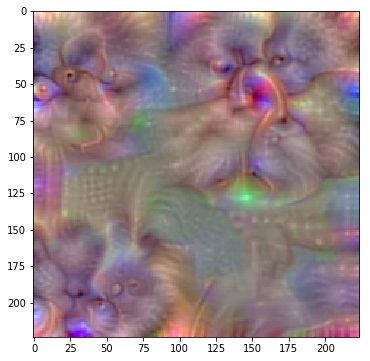

In [23]:
img = visualize_activation(model, layer_idx, filter_indices=CLASS_ID, max_iter=500, verbose=True)
plt.imshow(img)

Following <a href="https://raghakot.github.io/keras-vis/visualizations/activation_maximization/">the hints</a> of the library's author, let's try to introduce Jitter.

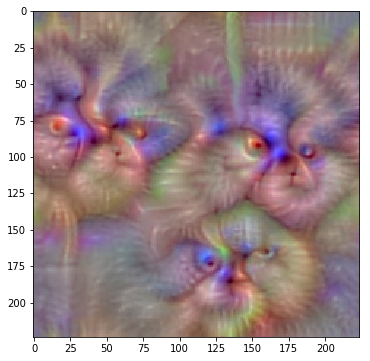

In [24]:
from vis.input_modifiers import Jitter


# Jitter 16 pixels along all dimensions to during the optimization process.
img = visualize_activation(model, layer_idx, filter_indices=CLASS_ID, max_iter=500, input_modifiers=[Jitter(16)])
plt.imshow(img)

In the end, let's try to plot heatmap of our CNN and see which part of image triggered it to believe that this is a persian cat. 

For that, we will use the <a href="https://raghakot.github.io/keras-vis/vis.visualization/#visualize_cam">visualize_cam</a> function from Keras API. 

Intuition + papre reference for how it works <a href="https://jacobgil.github.io/deeplearning/class-activation-maps">can be found here</a>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


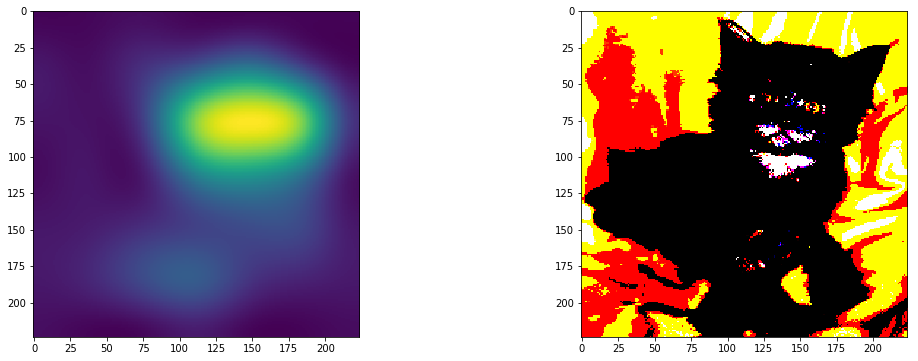

In [25]:
from vis.visualization import visualize_cam

img = visualize_cam(model, layer_idx, filter_indices=CLASS_ID, seed_input=image_processed)
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(image_processed[0])

**Excercise 1.** Try to upload your own picture and see how would it be recognized by the network! You can use <a href="https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a">Imagenet data</a> to see what classes can you expect!



In [44]:
def load_and_classify(fname):
    raw_image = load_img('./data/cnn_image/'+fname, target_size=(224, 224))
    plt.imshow(raw_image)
    image_arr = img_to_array(raw_image)
    image = image_arr.reshape((1, image_arr.shape[0], image_arr.shape[1], image_arr.shape[2]))
    image_processed = preprocess_input(image)
    item = model.predict(image_processed)
    labels = decode_predictions(item)
    print(labels)
    return image_processed

[[('n01873310', 'platypus', 20.490664), ('n02444819', 'otter', 15.437665), ('n02484975', 'guenon', 13.454391), ('n01601694', 'water_ouzel', 13.013236), ('n01580077', 'jay', 11.216944)]]


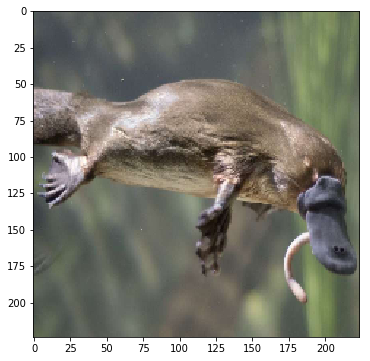

In [47]:
image_processed = load_and_classify('platy2.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


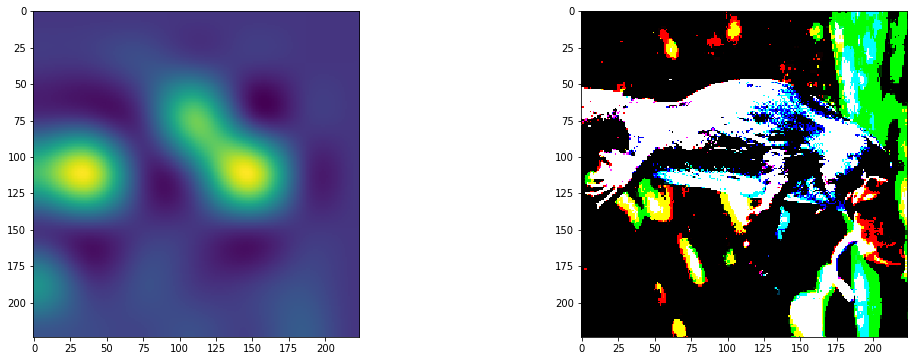

In [48]:
from vis.visualization import visualize_cam

img = visualize_cam(model, layer_idx, filter_indices=CLASS_ID, seed_input=image_processed)
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(image_processed[0])

**Excercise 2.** Pick <a href="https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a">Imagenet class</a> other than cat. Try to see what activates neuron responsible for it.



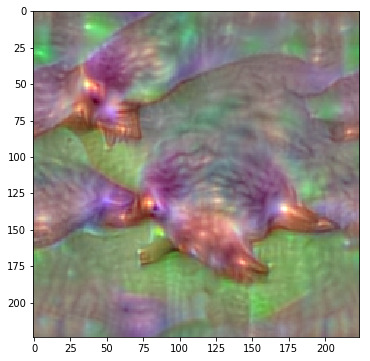

In [49]:
CLASS_PLATYPUS = 103
img = visualize_activation(model, layer_idx, filter_indices=CLASS_PLATYPUS, max_iter=500, input_modifiers=[Jitter(16)])
plt.imshow(img)